In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("personality_dataset.csv")

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Time_spent_Alone

Waktu yang dihabiskan sendirian (jam/hari).

Semakin tinggi → cenderung introvert.

Stage_fear

Takut berbicara di depan umum (Yes/No).

"Yes" → cenderung introvert.

Social_event_attendance

Jumlah kehadiran di acara sosial.

Semakin tinggi → cenderung ekstrovert.

Going_outside

Frekuensi keluar rumah.

Semakin tinggi → cenderung ekstrovert.

Drained_after_socializing

Merasa lelah setelah sosialisasi (Yes/No).

"Yes" → cenderung introvert.

Friends_circle_size

Jumlah teman dekat.

Semakin banyak → cenderung ekstrovert.

Post_frequency

Frekuensi posting di media sosial.

Semakin sering → cenderung ekstrovert.

Personality

Label kepribadian (Extrovert/Introvert).

Target yang akan diprediksi oleh model.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.isnull()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2895,False,False,False,False,False,False,False,False
2896,False,False,False,False,False,False,False,False
2897,False,False,False,False,False,False,False,False
2898,False,False,False,True,False,False,False,False


# EDA

In [6]:
# Konversi kolom kategorikal menjadi numerik untuk visualisasi
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

In [7]:
# Set style
sns.set(style='whitegrid')

# Waktu Sendiri vs Kepribadian

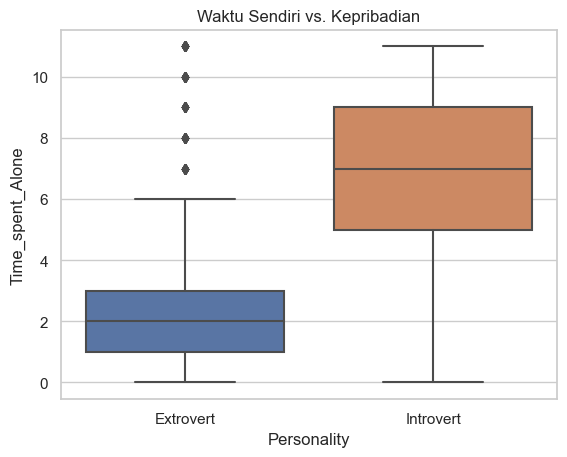

In [8]:
sns.boxplot(x='Personality', y='Time_spent_Alone', data=df)
plt.title('Waktu Sendiri vs. Kepribadian')
plt.show()

Visualisasi boxplot di atas menunjukkan distribusi waktu yang dihabiskan sendirian oleh individu dengan kepribadian Extrovert dan Introvert. Terlihat bahwa individu introvert secara signifikan lebih sering menghabiskan waktu sendiri, dengan nilai median sekitar 7 jam, sementara extrovert cenderung berada di sekitar 2 jam. Rentang interkuartil (IQR) untuk introvert juga lebih luas, menunjukkan variasi waktu yang lebih besar, sedangkan extrovert memiliki rentang yang lebih sempit dan beberapa outlier ke atas. Visualisasi ini mendukung pemahaman umum bahwa introvert cenderung membutuhkan lebih banyak waktu untuk menyendiri sebagai bentuk pemulihan energi, sementara extrovert lebih sedikit menghabiskan waktu sendiri dan lebih aktif secara sosial.

# Stage Fear pada Introvert

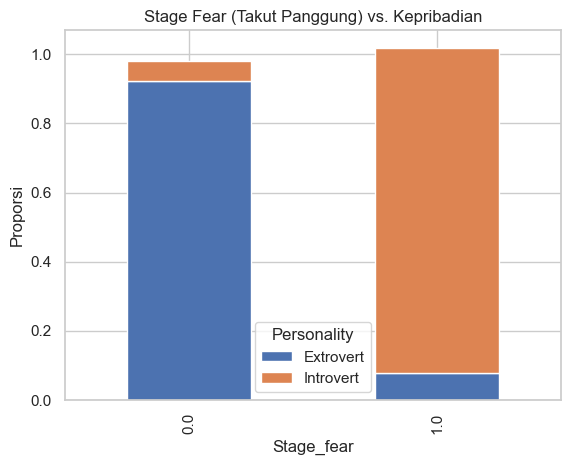

In [9]:
pd.crosstab(df['Stage_fear'], df['Personality'], normalize='columns').plot(kind='bar', stacked=True)
plt.title('Stage Fear (Takut Panggung) vs. Kepribadian')
plt.ylabel('Proporsi')
plt.show()

Visualisasi di atas menunjukkan hubungan antara rasa takut tampil di depan umum (Stage Fear) dan kepribadian (Personality). Pada grafik, nilai 0.0 menunjukkan tidak takut panggung, sedangkan 1.0 berarti memiliki rasa takut tampil. Terlihat bahwa sebagian besar individu yang tidak takut tampil di depan umum (stage fear = 0.0) adalah Extrovert, sedangkan mayoritas yang memiliki ketakutan untuk tampil di depan umum (stage fear = 1.0) adalah Introvert. Hal ini mendukung asumsi umum bahwa extrovert lebih nyaman berada di lingkungan sosial yang luas dan tampil di depan orang banyak, sementara introvert cenderung merasa cemas atau tidak nyaman dalam situasi tersebut.

# Kehadiran Acara Sosial

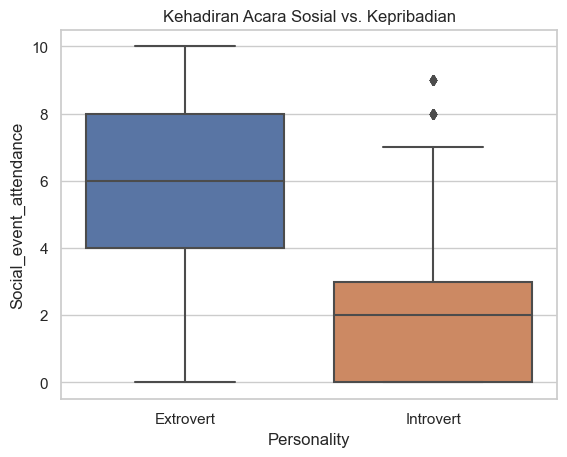

In [10]:
sns.boxplot(x='Personality', y='Social_event_attendance', data=df)
plt.title('Kehadiran Acara Sosial vs. Kepribadian')
plt.show()

Visualisasi di atas menunjukkan hubungan antara kepribadian (Extrovert dan Introvert) dengan tingkat kehadiran dalam acara sosial (Social_event_attendance). Dari grafik boxplot terlihat bahwa individu dengan kepribadian Extrovert cenderung lebih sering menghadiri acara sosial, dengan nilai tengah (median) yang lebih tinggi dan distribusi kehadiran yang lebih luas dibandingkan dengan Introvert. Sementara itu, individu Introvert umumnya memiliki frekuensi kehadiran yang lebih rendah, dengan banyak yang memiliki nilai kehadiran mendekati nol. Ini menunjukkan bahwa kepribadian memiliki pengaruh signifikan terhadap partisipasi dalam aktivitas sosial, di mana extrovert lebih aktif bersosialisasi dibandingkan introvert.

# Frekuensi Keluar Rumah

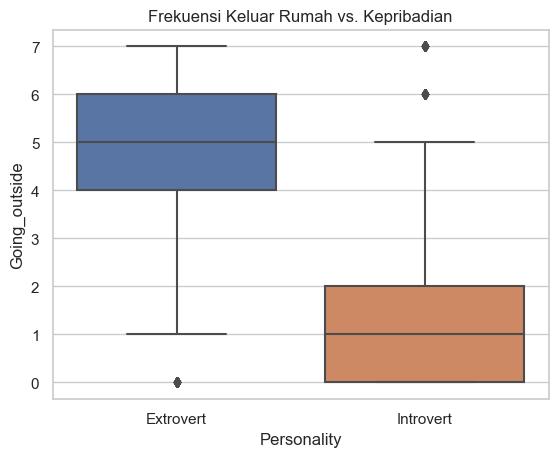

In [12]:
sns.boxplot(x='Personality', y='Going_outside', data=df)
plt.title('Frekuensi Keluar Rumah vs. Kepribadian')
plt.show()

Visualisasi ini menggambarkan perbandingan frekuensi keluar rumah antara individu berkepribadian Extrovert dan Introvert. Dari grafik terlihat bahwa Extrovert cenderung lebih sering keluar rumah, dengan median frekuensi yang lebih tinggi dan rentang distribusi yang lebih besar. Sebaliknya, individu Introvert memiliki median yang jauh lebih rendah dan sebagian besar berada pada rentang yang lebih kecil, menunjukkan bahwa mereka lebih jarang keluar rumah. Hal ini mengindikasikan bahwa kepribadian berperan penting dalam menentukan tingkat aktivitas di luar rumah, di mana extrovert lebih aktif secara sosial dibandingkan introvert.

# Energi Setelah Sosialisasi

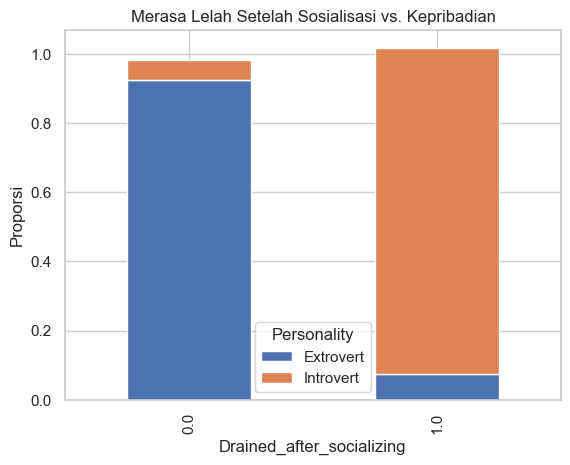

In [13]:
pd.crosstab(df['Drained_after_socializing'], df['Personality'], normalize='columns').plot(kind='bar', stacked=True)
plt.title('Merasa Lelah Setelah Sosialisasi vs. Kepribadian')
plt.ylabel('Proporsi')
plt.show()

Visualisasi ini menunjukkan hubungan antara kepribadian dengan perasaan lelah setelah bersosialisasi. Terlihat bahwa mayoritas individu Introvert cenderung merasa lelah setelah melakukan aktivitas sosial (Drained_after_socializing = 1), sementara sebagian besar individu Extrovert tidak mengalami kelelahan setelah bersosialisasi (Drained_after_socializing = 0). Temuan ini konsisten dengan karakteristik dasar kepribadian, di mana introvert cenderung menguras energi dalam interaksi sosial yang intens, sedangkan extrovert justru memperoleh energi dari situasi sosial tersebut.

# Ukuran Lingkaran Pertemanan

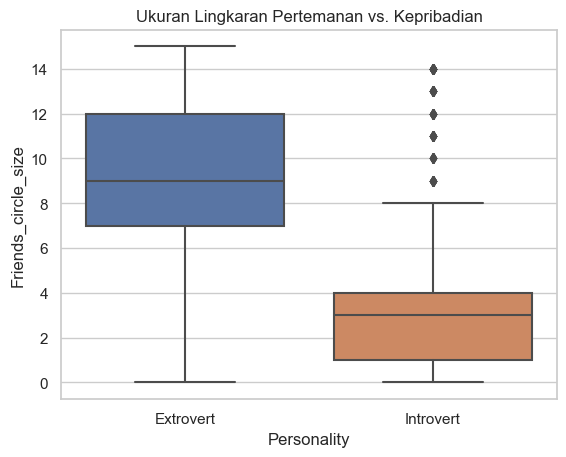

In [14]:
sns.boxplot(x='Personality', y='Friends_circle_size', data=df)
plt.title('Ukuran Lingkaran Pertemanan vs. Kepribadian')
plt.show()

Visualisasi ini menggambarkan perbandingan ukuran lingkaran pertemanan antara individu berkepribadian extrovert dan introvert. Terlihat bahwa individu extrovert secara umum memiliki lingkaran pertemanan yang lebih besar, dengan nilai tengah (median) yang lebih tinggi serta rentang interkuartil yang lebih luas dibandingkan introvert. Sementara itu, introvert cenderung memiliki lingkaran pertemanan yang lebih kecil dan lebih konsisten, meskipun terdapat beberapa outlier yang menunjukkan bahwa sebagian kecil introvert juga memiliki jumlah teman yang cukup banyak. Temuan ini mencerminkan kecenderungan alami extrovert untuk menjalin relasi sosial yang lebih luas dibandingkan introvert.

# Frekuensi Postingan Media Sosial

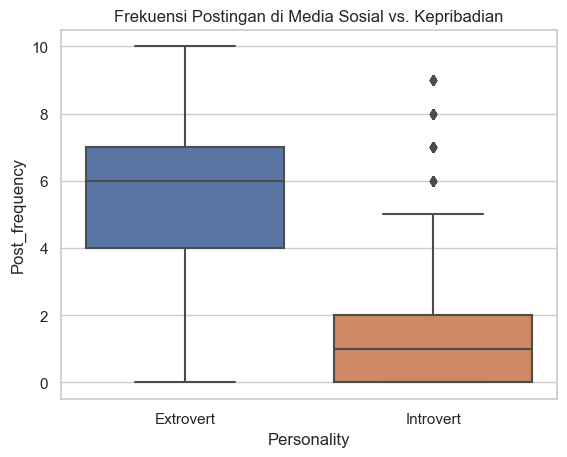

In [15]:
sns.boxplot(x='Personality', y='Post_frequency', data=df)
plt.title('Frekuensi Postingan di Media Sosial vs. Kepribadian')
plt.show()

Visualisasi ini menunjukkan perbandingan frekuensi postingan di media sosial antara individu extrovert dan introvert. Dari grafik terlihat bahwa extrovert memiliki kecenderungan untuk lebih sering memposting di media sosial dibandingkan introvert, dengan nilai median dan rentang interkuartil yang lebih tinggi. Sementara itu, introvert umumnya memiliki frekuensi posting yang rendah dan distribusi data yang lebih sempit, meskipun terdapat beberapa outlier yang menunjukkan adanya introvert yang juga cukup aktif di media sosial. Hasil ini mencerminkan perbedaan gaya komunikasi dan ekspresi diri antara kedua tipe kepribadian tersebut.

# Kesimpulan

Berdasarkan visualisasi yang telah dianalisis, terdapat pola yang konsisten antara kepribadian individu (extrovert dan introvert) dengan perilaku sosial mereka. Individu extrovert cenderung lebih sering keluar rumah, memiliki lingkaran pertemanan yang lebih besar, dan lebih aktif dalam memposting di media sosial. Sebaliknya, individu introvert lebih sering merasa lelah setelah bersosialisasi, jarang keluar rumah, memiliki lingkaran pertemanan yang lebih kecil, dan lebih jarang memposting di media sosial. Hasil ini menunjukkan bahwa dimensi kepribadian berperan penting dalam membentuk pola interaksi sosial baik secara langsung maupun digital.

***THANK YOU***